In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# I'll add train and test dataset to get the whole population for Central Limit Theorem
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# concat both tsble to get the total population
# total dataset=1309 and then I do suffling using sample function
df = pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309)

In [6]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
153,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.00,0,2,350405,12.1833,NaN,S
419,420,3,"Van Impe, Miss. Catharina",female,10.00,0,2,345773,24.1500,NaN,S
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
233,234,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S
331,332,1,"Partner, Mr. Austen",male,45.50,0,0,113043,28.5000,C124,S


<Axes: ylabel='Density'>

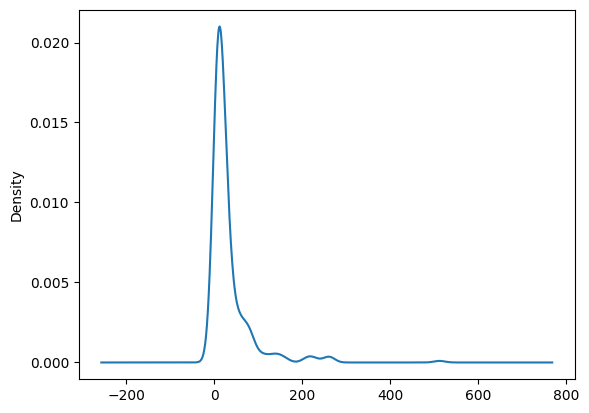

In [7]:
# distribution of population
df['Fare'].plot(kind='kde')

### We dont know population mean and standard deviation. So we will use T-procedure to find Confidence interval and then infer mean and standard deviation of the population.

### Given : 
- Total population : 1306
- sample size 30
- Create sampling distribution using CLT for 10 trials.
- 95% confidence level

### formula
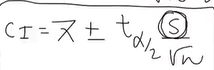

### In formula we have to use standard deviation, but we have variable std deviation because of 10 differents sample. So we will take mean of all 10 stds and put it in place of s in formula.

In [8]:
# Central Limit Theorem 
# sample size = 30 -> 10 times
samples = []
stds=[]
for i in range(10):
    x=df['Fare'].dropna().sample(30).values
    stds.append(x.std())
    samples.append(x.tolist())

In [9]:
# 10 samples having 30 people in each sample
samples = np.array(samples)

In [10]:
samples

array([[211.5   ,   7.2292,  26.    ,  14.4542,   7.925 ,  13.    ,
         90.    ,  12.475 ,   7.75  ,   7.75  ,  15.55  ,   7.55  ,
         23.45  , 133.65  ,  29.7   ,   7.8542,  20.575 ,   7.775 ,
          7.8958,   7.7375,   9.5   ,  26.    ,   8.05  ,   7.925 ,
        136.7792,  26.3875,  49.5042,   7.775 ,  28.7125,  39.6875],
       [  7.75  ,   8.05  ,  83.1583,  14.4542,   8.05  ,   8.05  ,
          7.8542,  65.    ,  37.0042,  13.4167,  12.35  ,   0.    ,
         61.175 ,  52.    ,  26.25  ,  23.    ,  15.5   ,  53.1   ,
          7.05  ,  11.2417,  10.5   ,   7.7958,   7.75  ,   9.5   ,
          7.125 ,   7.225 ,  13.    ,  56.4958, 221.7792,  35.5   ],
       [  9.5   ,   7.25  ,  30.    ,   9.825 ,   7.225 ,   7.775 ,
         10.5   ,   8.05  ,  15.9   , 211.5   ,   7.125 , 151.55  ,
         49.5042,  14.1083,  39.6875,   0.    , 221.7792,   7.925 ,
          8.05  ,  61.3792,   8.05  ,  31.3875,   7.925 ,   8.6625,
         46.9   ,   7.8958,   8.6625,   7.775 

In [11]:
# sampling mean of sample distribution
# x bar value of formula
sampling_means = samples.mean(axis=1)

In [12]:
# s value of formula 
sampling_stds = np.mean(stds)

### n is given. Now, Only t(alpha/2) value is pending

In [13]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

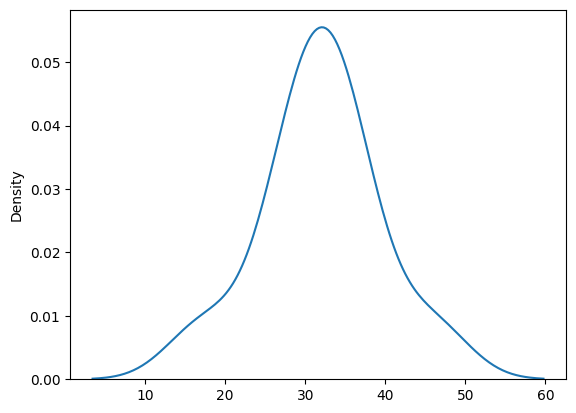

In [14]:
# sampling distribution of sample mean is normal
sns.kdeplot(sampling_means)

In [15]:
# sample mean
sampling_means.mean()

31.884028

In [16]:
# if population std is sigma then sample std will be sigma/n*0.5
sampling_means.std()/np.sqrt(50)

0.9870400927918491

In [17]:
# In real world data, population mean is not exactly same as sample mean
# So, we find a range of mean in which probability of sample mean would lie(confidence interval) 
# we would consider the 2 standard deviation (95% confidence) about mean
# t procedure formula to find CI
lower_limit = sampling_means.mean() - 2.045*(sampling_stds/np.sqrt(30))
upper_limit = sampling_means.mean() + 2.045*(sampling_stds/np.sqrt(30))

In [18]:
print('The range is',lower_limit,'-',upper_limit)

The range is 16.16972578086568 - 47.598330219134326


In [19]:
df['Fare'].dropna().mean()  # We can see population mean is lying the above range 

33.29547928134557

### This proves sample mean is approximate equal to population mean and sample is std/n*0.5. 